In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/Deep_learning/HW4/images/hw04_coco_data/Train/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


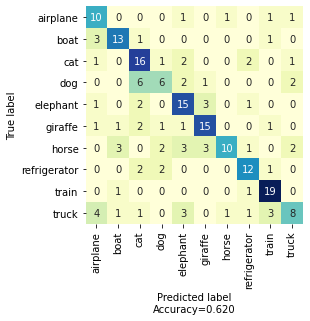

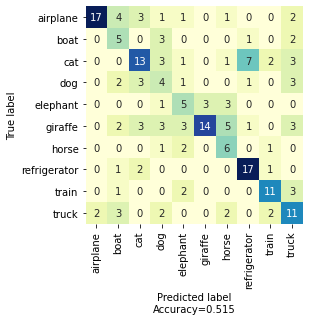

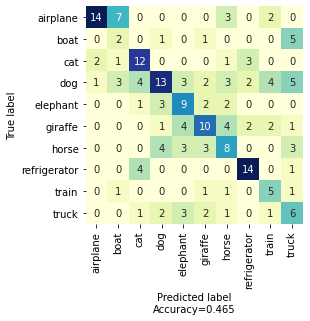

In [ ]:
my_imageroot='/content/drive/MyDrive/Deep_learning/HW4/images/hw04_coco_data/Val/'
import re
output_root='/content/drive/MyDrive/Deep_learning/HW4/images/hw04_coco_data/Val/'
output_root= re.sub('Val/', '', output_root)
output_root=output_root+'Train/'
print(output_root)
my_classlist=['airplane','boat','cat','dog','elephant','giraffe','horse','refrigerator','train','truck']
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns			
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
from torchvision import datasets
from torchvision import transforms as tvt
from torch.utils.data import DataLoader
transform = tvt.Compose([ tvt.ToTensor () , tvt. Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))])
test_dataset = datasets.ImageFolder(my_imageroot, transform=transform)
test_data_loader = DataLoader(dataset = test_dataset,batch_size =600,shuffle =True,num_workers=4)
#print('len=',len(test_data_loader))
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
dtype = torch.float64
device = torch.device ("cuda:0" if torch.cuda.is_available () 
                                  else "cpu")
seed = 0
random.seed(seed)
torch.manual_seed(seed)
epochs = 30 # feel free to adjust this parameter
os.chdir(my_imageroot)

class TemplateNet(torch.nn.Module):
      def __init__(self):
          super(TemplateNet, self).__init__()
          self.conv1 = nn.Conv2d(3, 128, 3) ## (A)
          self.conv2 = nn.Conv2d(128, 128, 3) ## (B)
          self.pool = nn.MaxPool2d(2, 2)
          self.fc1 = nn.Linear(128*31*31, 1000) ## (C)
          self.fc2 = nn.Linear(1000, 10)
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = x.view(-1, 128*31*31) ## (E)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
net_1 = TemplateNet()
net_1.load_state_dict(torch.load(output_root+'/net1.pth', map_location=torch.device('cpu')))
net_1 = net_1.to(device)

for i, data in enumerate(test_data_loader):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)        
    outputs = net_1(inputs)
predictions_1 = []
for i in range(outputs.shape[0]):
	predictions_1.append(torch.argmax(outputs[i]).cpu().numpy())
labels = np.array(labels.cpu())
#print(predictions_1)
os.chdir(output_root)
cm_1=confusion_matrix(labels, predictions_1)
plt.figure(2)
annot=np.asarray(np.meshgrid(np.asarray(my_classlist),np.asarray(my_classlist)))
data_1 = pd.DataFrame(cm_1, my_classlist, my_classlist)
sns.heatmap(data_1, annot=True, square=True,cmap="YlGnBu", fmt = 'd', cbar = False)
score_1= accuracy_score(labels, predictions_1)
plt.ylabel('True label')
plt.xlabel('Predicted label\nAccuracy={:0.3f}'.format(score_1))
plt.savefig('net1_confusion_matrix.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=500)



class TemplateNet(torch.nn.Module):
      def __init__(self):
          super(TemplateNet, self).__init__()
          self.conv1 = nn.Conv2d(3, 128, 3) ## (A)
          self.conv2 = nn.Conv2d(128, 128, 3) ## (B)
          self.pool = nn.MaxPool2d(2, 2)
          self.fc1 = nn.Linear(128*14*14, 1000) ## (C)
          self.fc2 = nn.Linear(1000, 10)
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 128*14*14) ## (E)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
net_2 = TemplateNet()
net_2.load_state_dict(torch.load(output_root+'/net2.pth'))
net_2 = net_2.to(device)

for i, data in enumerate(test_data_loader):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)        
    outputs = net_2(inputs)
predictions_2 = []
for i in range(outputs.shape[0]):
	predictions_2.append(torch.argmax(outputs[i]).cpu().numpy())
labels = np.array(labels.cpu())
#print(predictions_2)
os.chdir(output_root)
cm_2=confusion_matrix(labels, predictions_2)
plt.figure()
data_2 = pd.DataFrame(cm_2, my_classlist, my_classlist)
sns.heatmap(data_2.T, square=True, annot=True,cmap="YlGnBu", fmt = 'd', cbar = False)
score_2= accuracy_score(labels, predictions_2)
plt.ylabel('True label')
plt.xlabel('Predicted label\nAccuracy={:0.3f}'.format(score_2))
plt.savefig('net2_confusion_matrix.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=500)


class TemplateNet(torch.nn.Module):
      def __init__(self):
          super(TemplateNet, self).__init__()
          self.conv1 = nn.Conv2d(3, 128, 3,padding=1) ## (A)
          self.conv2 = nn.Conv2d(128, 128, 3) ## (B)
          self.pool = nn.MaxPool2d(2, 2)
          self.fc1 = nn.Linear(128*15*15, 1000) ## (C)
          self.fc2 = nn.Linear(1000, 10)
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 128*15*15) ## (E)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
net_3 = TemplateNet()
net_3.load_state_dict(torch.load(output_root+'/net3.pth'))
net_3 = net_3.to(device)

for i, data in enumerate(test_data_loader):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)        
    outputs = net_3(inputs)
predictions_3 = []
for i in range(outputs.shape[0]):
	predictions_3.append(torch.argmax(outputs[i]).cpu().numpy())
labels = np.array(labels.cpu())
#print(predictions_3)
os.chdir(output_root)
cm_3=confusion_matrix(labels, predictions_3)
plt.figure()
data_3 = pd.DataFrame(cm_3, my_classlist, my_classlist)
sns.heatmap(data_3.T, square=True,cmap="YlGnBu",annot=True, fmt = 'd', cbar = False)
score_3= accuracy_score(labels, predictions_3)
plt.ylabel('True label')
plt.xlabel('Predicted label\nAccuracy={:0.3f}'.format(score_3))
plt.savefig('net3_confusion_matrix.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=500)